In [1]:
# import libraries
import pandas as pd
import re
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
amino = pd.read_csv("AA & sugars Polemonium.csv")

In [3]:
soil = pd.read_csv("soil-Tabela 1.csv", sep=";")

In [4]:
soil.drop(soil.columns[[3,4]],axis=1, inplace=True)

In [5]:
biomass = pd.read_csv("biomass-Tabela 1.csv", sep=";")

In [6]:
df3 = pd.merge(soil, biomass, on='Nr próby')

In [7]:
df3.head()

,Nr próby,Fe %,Ca %,K %,TN%,TC%,TP%
0,BBR1,1.17,2.21,0.54,2.37,43.02,0.149
1,BBR2,0.76,2.70,0.89,2.37,43.01,0.140
2,BIA1,0.82,0.16,0.98,1.93,43.13,0.238
3,BIA2,0.48,0.04,2.44,1.50,42.77,0.284
4,BOB1,1.71,0.50,1.26,1.44,42.47,0.156


In [8]:
df3['Nr próby'] = df3['Nr próby'].str[:-1]

In [9]:
df = pd.merge(amino, df3, how='left', left_on='pop', right_on='Nr próby')

In [10]:
amino.head()

,pop,LOC,ln_pop_size_2018,freq_of_visit,seed_prod,phase,fru ug/ul,glu ug/ul,sac ug/ul,AAs sum [pmol/uL],...,NVA %,TRP %,PHE %,ILE %,ORN %,LEU %,LYS %,HYP %,SAR %,PRO %
0,BIA,NE,4.61,13.4,12.3,M,70.098400,19.66292,63.411520,1751.187429,...,0.79,0.5,5.71,2.00,2.91,1.33,3.74,NaN,1.29,4.60
1,BIA,NE,4.61,13.4,12.3,F,138.228000,68.32804,1.913312,195.012100,...,NaN,NaN,3.92,2.01,3.63,3.40,10.67,NaN,NaN,NaN
2,BOB,N,3.69,1.0,12.6,M,33.781800,9.70473,6.147660,469.099865,...,NaN,NaN,2.91,2.29,2.73,1.06,NaN,NaN,5.00,14.34
3,BOB,N,3.69,1.0,12.6,F,124.218000,49.34385,10.057260,148.956264,...,NaN,NaN,3.50,2.45,NaN,3.40,1.45,NaN,NaN,NaN
4,CZL,S,6.21,5.4,12.0,M,40.299948,20.44272,88.108992,144.522395,...,NaN,NaN,9.37,2.69,NaN,8.26,NaN,NaN,NaN,2.40


In [11]:
df.head()

,pop,LOC,ln_pop_size_2018,freq_of_visit,seed_prod,phase,fru ug/ul,glu ug/ul,sac ug/ul,AAs sum [pmol/uL],...,HYP %,SAR %,PRO %,Nr próby,Fe %,Ca %,K %,TN%,TC%,TP%
0,BIA,NE,4.61,13.4,12.3,M,70.0984,19.66292,63.411520,1751.187429,...,NaN,1.29,4.60,BIA,0.82,0.16,0.98,1.93,43.13,0.238
1,BIA,NE,4.61,13.4,12.3,M,70.0984,19.66292,63.411520,1751.187429,...,NaN,1.29,4.60,BIA,0.48,0.04,2.44,1.50,42.77,0.284
2,BIA,NE,4.61,13.4,12.3,F,138.2280,68.32804,1.913312,195.012100,...,NaN,NaN,NaN,BIA,0.82,0.16,0.98,1.93,43.13,0.238
3,BIA,NE,4.61,13.4,12.3,F,138.2280,68.32804,1.913312,195.012100,...,NaN,NaN,NaN,BIA,0.48,0.04,2.44,1.50,42.77,0.284
4,BOB,N,3.69,1.0,12.6,M,33.7818,9.70473,6.147660,469.099865,...,NaN,5.00,14.34,BOB,1.71,0.50,1.26,1.44,42.47,0.156


In [12]:
amino.rename(columns = lambda x : str(x).replace(" %", ""), inplace=True)

In [13]:
amino.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 40 columns):
pop                  28 non-null object
LOC                  28 non-null object
ln_pop_size_2018     28 non-null float64
freq_of_visit        28 non-null float64
seed_prod            28 non-null float64
phase                28 non-null object
fru ug/ul            28 non-null float64
glu ug/ul            28 non-null float64
sac ug/ul            28 non-null float64
AAs sum [pmol/uL]    28 non-null float64
ASP                  28 non-null float64
GLU                  28 non-null float64
ASN                  26 non-null float64
SER                  28 non-null float64
GLN                  28 non-null float64
HIS                  17 non-null float64
GLY                  24 non-null float64
THR                  28 non-null float64
CIT                  25 non-null float64
ARG                  28 non-null float64
BALA                 28 non-null float64
ALA                  19 non-null float6

In [14]:
amino.fillna(0, inplace=True)

In [15]:
col = {'NE':'#228B22', 'N':'#46c4fd', 'S':"#e5247e"}
amino["colors"] = amino.LOC.apply(lambda x: col[x])

/home/kodolamacz/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:51: FutureWarning: 'argmax' is deprecated, use 'idxmax' instead. The behavior of 'argmax'
will be corrected to return the positional maximum in the future.
Use 'series.values.argmax' to get the position of the maximum now.
  return getattr(obj, method)(*args, **kwds)


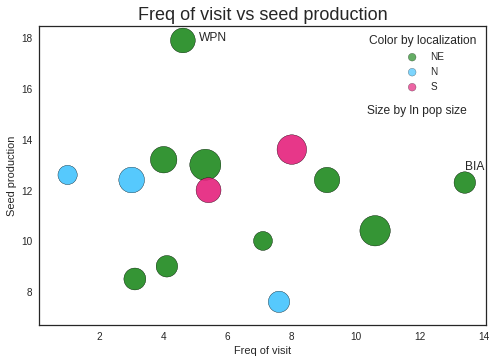

In [16]:
labels =[]
sns.set_style("white")
for key, value in col.items():
    labels.append(key)
    plt.scatter(x = amino.freq_of_visit[amino.LOC == key], y = amino.seed_prod[amino.LOC == key],
            s = np.array(amino.ln_pop_size_2018[amino.LOC == key])*100, 
            c = amino.colors[amino.LOC == key], alpha=0.7, edgecolors='black')

#plt.yscale('log')
#plt.xscale('log') 
plt.xlabel('Freq of visit')
plt.ylabel('Seed production')
plt.title('Freq of visit vs seed production', fontsize=18)

#Annotate max values
plt.text(amino.freq_of_visit[np.argmax(amino.seed_prod)]+0.5, amino.seed_prod.max(), amino["pop"].loc[np.argmax(amino.seed_prod)])
plt.text(amino.freq_of_visit.max(), amino.seed_prod[amino.freq_of_visit == amino.freq_of_visit.max()][0]+0.5,
         amino["pop"].loc[amino.freq_of_visit == amino.freq_of_visit.max()][0])

lgnd = plt.legend(labels, title='Color by localization')
for i in range(len(col)):
    lgnd.legendHandles[i]._sizes = [60]

plt.text(10.35,15, "Size by ln pop size")
#plt.scatter(110, 51, s=100, c = 'white', edgecolors='k')
#plt.text(140, 49.8,  r'$0.1 \mu g$')

# Show the plot
plt.show()

In [17]:
#Exploratory analysis of aminoacids in nectar by pollinator
df2 = amino.drop(["fru ug/ul", "glu ug/ul", "sac ug/ul"], axis=1)
#reshaping df
df2 = pd.melt(df2, id_vars=['LOC'])
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1036 entries, 0 to 1035
Data columns (total 3 columns):
LOC         1036 non-null object
variable    1036 non-null object
value       1036 non-null object
dtypes: object(3)
memory usage: 24.4+ KB


In [18]:
df2.variable.unique()

array(['pop', 'ln_pop_size_2018', 'freq_of_visit', 'seed_prod', 'phase',
       'AAs sum [pmol/uL]', 'ASP', 'GLU', 'ASN', 'SER', 'GLN', 'HIS',
       'GLY', 'THR', 'CIT', 'ARG', 'BALA', 'ALA', 'TAU', 'GABA', 'BABA',
       'TYR', 'AABA', 'CYS', 'VAL', 'MET', 'NVA', 'TRP', 'PHE', 'ILE',
       'ORN', 'LEU', 'LYS', 'HYP', 'SAR', 'PRO', 'colors'], dtype=object)

In [19]:
aminokwasy = df2[df2["variable"].isin(['ASP', 'GLU', 'ASN', 'SER', 'GLN', 'HIS',
       'GLY', 'THR', 'CIT', 'ARG', 'BALA', 'ALA', 'TAU', 'GABA', 'BABA',
       'TYR', 'AABA', 'CYS', 'VAL', 'MET', 'NVA', 'TRP', 'PHE', 'ILE',
       'ORN', 'LEU', 'LYS', 'HYP', 'SAR', 'PRO'])]

In [20]:
aminokwasy['value'] = aminokwasy.value.astype("float")

/home/kodolamacz/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


/home/kodolamacz/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:482: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data[hue_mask])


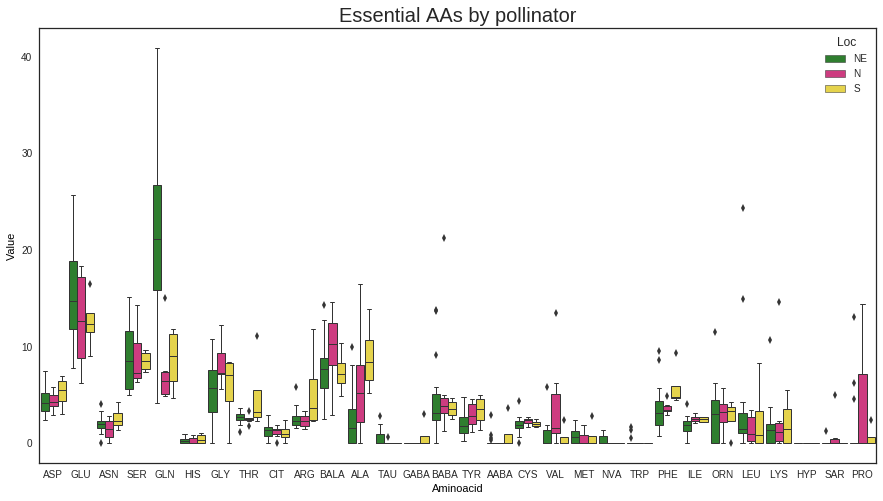

In [21]:
#boxplots grouped by pollinator
plt.figure(figsize=(15,8))
sns.set_style("white")
ax = sns.boxplot(x="variable", y="value", hue="LOC", data=aminokwasy, linewidth=1, width=0.9,
                 palette=["#228B22", "#e5247e", "#ffe732", "#00447C","#991188"])
plt.xlabel("Aminoacid")
plt.ylabel("Value")
plt.legend(title="Loc")
plt.title("Essential AAs by pollinator", fontsize=20)
#ax.set_facecolor('white')
ax.yaxis.label.set_color('k')
ax.xaxis.label.set_color('k')
#ax.set_ylim(0,3000)
plt.show()

In [22]:
#selecting essential aa's except GLN
essential = df2[df2["variable"].isin(["ASP", "GLU", "SER", "PRO", "GLY","GLN", "ALA","VAL"])]

In [23]:
essential.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 224 entries, 168 to 1007
Data columns (total 3 columns):
LOC         224 non-null object
variable    224 non-null object
value       224 non-null object
dtypes: object(3)
memory usage: 7.0+ KB


In [24]:
essential['value'] = essential.value.astype("float")

/home/kodolamacz/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [25]:
essential.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 224 entries, 168 to 1007
Data columns (total 3 columns):
LOC         224 non-null object
variable    224 non-null object
value       224 non-null float64
dtypes: float64(1), object(2)
memory usage: 7.0+ KB


/home/kodolamacz/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:482: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data[hue_mask])


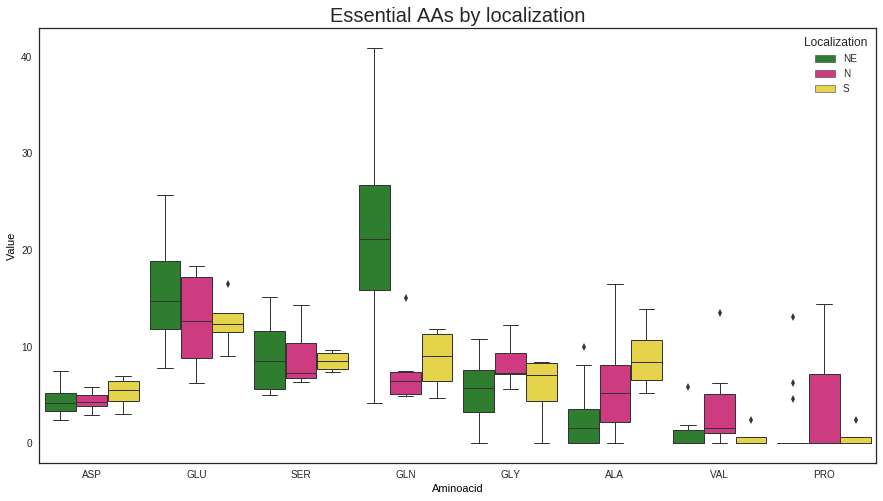

In [26]:
#boxplots grouped by pollinator
plt.figure(figsize=(15,8))
sns.set_style("white")
ax = sns.boxplot(x="variable", y="value", hue="LOC", data=essential, linewidth=1, width=0.9,
                 palette=["#228B22", "#e5247e", "#ffe732", "#00447C","#991188"])
plt.xlabel("Aminoacid")
plt.ylabel("Value")
plt.legend(title="Localization")
plt.title("Essential AAs by localization", fontsize=20)
#ax.set_facecolor('white')
ax.yaxis.label.set_color('k')
ax.xaxis.label.set_color('k')
#ax.set_ylim(0,3000)
plt.show()

In [27]:
amino.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 41 columns):
pop                  28 non-null object
LOC                  28 non-null object
ln_pop_size_2018     28 non-null float64
freq_of_visit        28 non-null float64
seed_prod            28 non-null float64
phase                28 non-null object
fru ug/ul            28 non-null float64
glu ug/ul            28 non-null float64
sac ug/ul            28 non-null float64
AAs sum [pmol/uL]    28 non-null float64
ASP                  28 non-null float64
GLU                  28 non-null float64
ASN                  28 non-null float64
SER                  28 non-null float64
GLN                  28 non-null float64
HIS                  28 non-null float64
GLY                  28 non-null float64
THR                  28 non-null float64
CIT                  28 non-null float64
ARG                  28 non-null float64
BALA                 28 non-null float64
ALA                  28 non-null float6

In [28]:
names =list(amino)[10:40]

In [29]:
names

['ASP',
 'GLU',
 'ASN',
 'SER',
 'GLN',
 'HIS',
 'GLY',
 'THR',
 'CIT',
 'ARG',
 'BALA',
 'ALA',
 'TAU',
 'GABA',
 'BABA',
 'TYR',
 'AABA',
 'CYS',
 'VAL',
 'MET',
 'NVA',
 'TRP',
 'PHE',
 'ILE',
 'ORN',
 'LEU',
 'LYS',
 'HYP',
 'SAR',
 'PRO']

In [30]:

# Feature Extraction with Univariate Statistical Tests (Chi-squared for classification)
import pandas
import numpy
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
# load data
# url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
# names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
# dataframe = pandas.read_csv(url, names=names)
array = amino.values
X = array[:,10:40]
Y = array[:,4]
X = StandardScaler().fit_transform(X)
lab_enc = preprocessing.LabelEncoder()
Y = lab_enc.fit_transform(Y)

# feature extraction
# test = SelectKBest(score_func=chi2, k=4)
# fit = test.fit(X, Y)
# # summarize scores
# numpy.set_printoptions(precision=3)
# print(fit.scores_)
# features = fit.transform(X)
# # summarize selected features
# print(features[0:5,:])

/home/kodolamacz/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:429: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, _DataConversionWarning)
/home/kodolamacz/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:429: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, _DataConversionWarning)


In [31]:
# sns.pairplot(amino.iloc[:,10:40])
# plt.show()

In [32]:
import numpy as np

np.random.seed(10)
# Feature Extraction with RFE
from pandas import read_csv
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
# load data
# feature extraction
model = LogisticRegression()
rfe = RFE(model, 3)
fit = rfe.fit(X, Y)
print("Num Features: %d" % fit.n_features_)
print("Selected Features: %s" % fit.support_)
print("Feature Ranking: %s" % fit.ranking_)

Num Features: 3
Selected Features: [False  True False False False False False False False False False False
 False False False False False False False False False False  True False
  True False False False False False]
Feature Ranking: [23  1 16 26 11 17 25 22  2 18 21 10  7 13 20 24 27 15  6 14  3  5  1 19
  1  4  9 28 12  8]


In [33]:
np.where(fit.support_)[0]

array([ 1, 22, 24])

In [34]:
list(names[i] for i in np.where(fit.support_)[0])

['GLU', 'PHE', 'ORN']

In [35]:
# Feature Importance with Extra Trees Classifier
np.random.seed(10)
from pandas import read_csv
from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier, AdaBoostClassifier, BaggingClassifier
# load data
# feature extraction
model = DecisionTreeClassifier()
model.fit(X, Y)
print(model.feature_importances_)

[0.         0.14837963 0.07583333 0.03888889 0.         0.
 0.         0.         0.07453704 0.08287037 0.         0.
 0.         0.         0.05833333 0.07734568 0.         0.
 0.07742424 0.         0.15371914 0.07685185 0.         0.
 0.         0.07748316 0.05833333 0.         0.         0.        ]


/home/kodolamacz/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [36]:
v = model.feature_importances_

In [37]:
sorted(zip(v, names), reverse=True)[:3]

[(0.15371913580246901, 'NVA'),
 (0.14837962962962964, 'GLU'),
 (0.08287037037037046, 'ARG')]

In [38]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [39]:
df.columns = df.columns.str.replace(' ', '_')

In [40]:
df.columns = df.columns.str.replace('_%', '')

In [41]:
df.columns = df.columns.str.replace('/', '')

In [67]:
df.columns = df.columns.str.replace('%', '')

In [68]:
df.head()

,pop,LOC,ln_pop_size_2018,freq_of_visit,seed_prod,phase,fru_ugul,glu_ugul,sac_ugul,AAs_sum_[pmoluL],...,HYP,SAR,PRO,Nr_próby,Fe,Ca,K,TN,TC,TP
0,BIA,NE,4.61,13.4,12.3,M,70.0984,19.66292,63.411520,1751.187429,...,0.0,1.29,4.60,BIA,0.82,0.16,0.98,1.93,43.13,0.238
1,BIA,NE,4.61,13.4,12.3,M,70.0984,19.66292,63.411520,1751.187429,...,0.0,1.29,4.60,BIA,0.48,0.04,2.44,1.50,42.77,0.284
2,BIA,NE,4.61,13.4,12.3,F,138.2280,68.32804,1.913312,195.012100,...,0.0,0.00,0.00,BIA,0.82,0.16,0.98,1.93,43.13,0.238
3,BIA,NE,4.61,13.4,12.3,F,138.2280,68.32804,1.913312,195.012100,...,0.0,0.00,0.00,BIA,0.48,0.04,2.44,1.50,42.77,0.284
4,BOB,N,3.69,1.0,12.6,M,33.7818,9.70473,6.147660,469.099865,...,0.0,5.00,14.34,BOB,1.71,0.50,1.26,1.44,42.47,0.156


In [43]:
df.fillna(0, inplace=True)

In [80]:
df1 = df[["pop", "ln_pop_size_2018", "fru_ugul", "glu_ugul","sac_ugul", "AAs_sum_[pmoluL]",
          "GLN", "GLU", "SER", "PHE", "ALA", "Fe", "K", "Ca", "TN","TC","TP"]]


In [81]:
df1.head()

,pop,ln_pop_size_2018,fru_ugul,glu_ugul,sac_ugul,AAs_sum_[pmoluL],GLN,GLU,SER,PHE,ALA,Fe,K,Ca,TN,TC,TP
0,BIA,4.61,70.0984,19.66292,63.411520,1751.187429,16.32,22.75,5.35,5.71,0.0,0.82,0.98,0.16,1.93,43.13,0.238
1,BIA,4.61,70.0984,19.66292,63.411520,1751.187429,16.32,22.75,5.35,5.71,0.0,0.48,2.44,0.04,1.50,42.77,0.284
2,BIA,4.61,138.2280,68.32804,1.913312,195.012100,4.19,20.15,4.98,3.92,0.0,0.82,0.98,0.16,1.93,43.13,0.238
3,BIA,4.61,138.2280,68.32804,1.913312,195.012100,4.19,20.15,4.98,3.92,0.0,0.48,2.44,0.04,1.50,42.77,0.284
4,BOB,3.69,33.7818,9.70473,6.147660,469.099865,7.11,17.89,6.57,2.91,3.4,1.71,1.26,0.50,1.44,42.47,0.156


In [82]:
df1.columns[1]

'ln_pop_size_2018'

In [83]:
for i in range(2,len(df1.columns)):
    df1[df1.columns[i]] = StandardScaler().fit_transform(df1[df1.columns[i]])

/home/kodolamacz/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:586: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/home/kodolamacz/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:649: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/home/kodolamacz/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See t

In [84]:
df1["fru_ugul"] = StandardScaler().fit_transform(df1.loc[:,"fru_ugul"])

/home/kodolamacz/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:586: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/home/kodolamacz/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:649: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/home/kodolamacz/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See t

In [88]:
df1.head()

,pop,LOC,ln_pop_size_2018,freq_of_visit,seed_prod,phase,fru_ugul,glu_ugul,sac_ugul,AAs_sum_[pmoluL],...,HYP,SAR,PRO,Nr_próby,Fe,Ca,K,TN,TC,TP
0,BIA,NE,4.61,13.4,12.3,M,70.0984,19.66292,63.411520,1751.187429,...,0.0,1.29,4.60,BIA,0.82,0.16,0.98,1.93,43.13,0.238
1,BIA,NE,4.61,13.4,12.3,M,70.0984,19.66292,63.411520,1751.187429,...,0.0,1.29,4.60,BIA,0.48,0.04,2.44,1.50,42.77,0.284
2,BIA,NE,4.61,13.4,12.3,F,138.2280,68.32804,1.913312,195.012100,...,0.0,0.00,0.00,BIA,0.82,0.16,0.98,1.93,43.13,0.238
3,BIA,NE,4.61,13.4,12.3,F,138.2280,68.32804,1.913312,195.012100,...,0.0,0.00,0.00,BIA,0.48,0.04,2.44,1.50,42.77,0.284
4,BOB,N,3.69,1.0,12.6,M,33.7818,9.70473,6.147660,469.099865,...,0.0,5.00,14.34,BOB,1.71,0.50,1.26,1.44,42.47,0.156


In [91]:
# construct our model, with our county now shown as a group
md = smf.mixedlm("fru_ugul ~ Fe+ Ca +K+ TN + TC+ TP", df1, groups=df1["ln_pop_size_2018"])
mdf = md.fit()
print(mdf.summary())

        Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: fru_ugul
No. Observations: 56      Method:             REML    
No. Groups:       13      Scale:              0.5160  
Min. group size:  4       Likelihood:         -73.8825
Max. group size:  8       Converged:          Yes     
Mean group size:  4.3                                 
------------------------------------------------------
            Coef.  Std.Err.   z    P>|z| [0.025 0.975]
------------------------------------------------------
Intercept    0.025    0.221  0.114 0.909 -0.407  0.458
Fe          -0.074    0.225 -0.331 0.741 -0.516  0.367
Ca          -0.220    0.237 -0.929 0.353 -0.684  0.244
K           -0.051    0.146 -0.348 0.728 -0.336  0.235
TN           0.038    0.180  0.210 0.834 -0.315  0.391
TC           0.117    0.168  0.697 0.486 -0.213  0.447
TP           0.014    0.169  0.085 0.932 -0.317  0.345
Group Var    0.506    0.471                           



In [78]:
from scipy import stats
from statsmodels.stats.diagnostic import lillifors

In [92]:
pVals = pd.Series()
# The scipy normaltest is based on D-Agostino and Pearsons test that
# combines skew and kurtosis to produce an omnibus test of normality.
_, pVals['Omnibus']    = stats.normaltest(mdf.resid)

# Shapiro-Wilk test
_, pVals['Shapiro-Wilk']    = stats.shapiro(mdf.resid)

# Or you can check for normality with Lilliefors-test
_, pVals['Lilliefors']    = lillifors(mdf.resid)

# Alternatively with original Kolmogorov-Smirnov test
_, pVals['Kolmogorov-Smirnov']    = stats.kstest((mdf.resid-np.mean(mdf.resid))/np.std(mdf.resid,ddof=1), 'norm')

print('p-values for all {0} data points: ----------------'.format(len(mdf.resid)))
print(pVals)

if pVals['Omnibus'] > 0.05:
    print('Data are normally distributed')

p-values for all 56 data points: ----------------
Omnibus               0.122217
Shapiro-Wilk          0.155798
Lilliefors            0.200000
Kolmogorov-Smirnov    0.830746
dtype: float64
Data are normally distributed


/home/kodolamacz/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:10: DeprecationWarning: `lillifors` is deprecated, use `lilliefors` instead!
Use lilliefors, lillifors will be removed in 0.9 
(Note: misspelling missing 'e')
